In [1]:
%matplotlib inline

In [2]:
import os
from astropy.table import Table

root_dirname = "/Users/aphearin/Dropbox/protoDC2"

umachine_basename = "umachine/mstar_1e8_cut/value_added_sfr_catalog_0.903592.hdf5"
umachine_fname = os.path.join(root_dirname, umachine_basename)
umachine = Table.read(umachine_fname, path='data')

# halos_basename = "umachine/host_halos/value_added_hlist_0.90359.hdf5"
# halos_fname = os.path.join(root_dirname, halos_basename)
# bpl_halos = Table.read(halos_fname, path='data')

fname = '/Users/aphearin/Dropbox/published_age_matching/published_mr_gr_dark_side1_mock.hdf5'
agm = Table.read(fname, path='data')
agm['x'] = np.copy(agm['pos'][:, 0])
agm['y'] = np.copy(agm['pos'][:, 1])
agm['z'] = np.copy(agm['pos'][:, 2])
agm['vx'] = np.copy(agm['vel'][:, 0])
agm['vy'] = np.copy(agm['vel'][:, 1])
agm['vz'] = np.copy(agm['vel'][:, 2])
del agm['pos']
del agm['vel']
print(agm.keys())

['id', 'pid', 'upid', 'mvir', 'rvir', 'rs', 'mmp', 'last_mm', 'vmax', 'treeid', 'macc', 'mpeak', 'vacc', 'vpeak', 'vmaxmagr', 'vaccmagr', 'vpeakmagr', 'vmatch', 'magr', 'a_acc', 'a_peak', 'c_acc', 'am12', 'afirst', 'cfirst', 'vfirst', 'aform', 'cform', 'cvir', 'zw02', 'zw02a', 'zacc', 'zquench', 'zm12', 'zfirst', 'zform', 'mhost', 'groupid', 'fibcol', 'bcgmag', 'magrtot', 'sigmav', 'n', 'nfcn', 'lumrank', 'rp', 'gr', 'ired', 'x', 'y', 'z', 'vx', 'vy', 'vz']


In [3]:
def load_sdss_colors_sample_value_added():
    """
    """
    dirname = "/Users/aphearin/work/sdss/umachine_colors_sdss_catalog"
    basename = "dr10_mgs_colors_value_added.hdf5"
    fname = os.path.join(dirname, basename)

    return Table.read(fname, path='data')
sdss = load_sdss_colors_sample_value_added()
sdss = sdss[sdss['rmag'] > -900]
sdss = sdss[sdss['sdss_petrosian_gr'] > -900]
sdss = sdss[sdss['sdss_petrosian_gr'] < 3]
sdss = sdss[sdss['sdss_petrosian_ri'] > -900]
sdss = sdss[sdss['sdss_petrosian_ri'] <3]
print(sdss.keys())

['ra', 'dec', 'z', 'sm', 'ssfr', 'nd', 'rmag', 'sdss_petrosian_gr', 'sdss_petrosian_ri', 'size_kpc', 'dr7_photoobj_id', 'ssfr_percentile_fixed_sm']


In [4]:
from rescale_dc2.matching_sdss_galaxy_selection import sdss_kd_tree_indices

mstar_mock = umachine['obs_sm']
sfr_percentile_mock = umachine['sfr_percentile_fixed_sm']

logsm_sdss = sdss['sm']
sfr_percentile_sdss = sdss['ssfr_percentile_fixed_sm']

nn_distinces, nn_indices = sdss_kd_tree_indices(
    mstar_mock, sfr_percentile_mock, logsm_sdss, sfr_percentile_sdss)
keys_to_inherit = ('rmag', 'sdss_petrosian_gr', 
                   'sdss_petrosian_ri', 'size_kpc', 'dr7_photoobj_id')
for key in keys_to_inherit:
    umachine[key] = sdss[key][nn_indices]

## Luminosity threshold clustering

In [15]:
zehavi_dirname = "/Users/aphearin/Dropbox/sham_colors/data/Zehavi_wp_lumthresh_colorsplit"

rp_zehavi = np.array(
    (0.17, 0.27, 0.42, 0.67, 1.1, 1.7, 2.7, 4.2, 6.7, 10.6, 16.9, 26.8))

wp_zehavi_18p0 = np.array(
    (294.3, 221.5, 161.4, 114.7, 75.5, 48.6, 32.4, 19.7, 10.8, 6.35, 3.62, 2.14))

wp_zehavi_18p5 = np.array(
    (313.3, 230.2, 165.4, 118.3, 79.7, 53.8, 37.4, 25.9, 17.4, 10.6, 5.31, 3.56))

wp_zehavi_19p0 = np.array(
    (322.5, 231.1, 162.4, 114.6, 75.5, 50.6, 35.0, 24.2, 15.3, 9.2, 4.11, 1.81))

wp_zehavi_19p5 = np.array(
    (307.0, 228.5, 159.3, 110.4, 72.9, 49.8, 34.6, 24.6, 16.7, 10.7, 5.73, 2.82))

wp_zehavi_20p0 = np.array((
    366.1, 264.3, 184.0, 128.6, 84.7, 59.4, 42.9, 30.9, 21.9, 14.6, 8.24, 4.88))

wp_zehavi_20p5 = np.array(
    (455.7, 296.9, 197.0, 134.1, 89.4, 61.1, 44.0, 31.2, 21.3, 13.7, 7.65, 4.09))

wp_zehavi_21p0 = np.array((
    586.2, 402.9, 258.7, 163.2, 105.5, 68.9, 50.2, 35.5, 24.5, 15.3, 8.54, 4.11))

wp_zehavi_21p5 = np.array(
    (1028.0, 731.7, 392.6, 228.6, 144.6, 94.3, 70.5, 48.6, 33.1, 20.9, 11.6, 6.04))


In [6]:
from halotools.mock_observables import wp, return_xyz_formatted_array

from astropy.cosmology import Planck15
littleh_correction = 5*np.log10(Planck15.h)

um_mask_18p5 = umachine['rmag'] < -18.5 + littleh_correction
um_mask_19p0 = umachine['rmag'] < -19.0 + littleh_correction
um_mask_19p5 = umachine['rmag'] < -19.5 + littleh_correction
um_mask_20p0 = umachine['rmag'] < -20.0 + littleh_correction
um_mask_20p5 = umachine['rmag'] < -20.5 + littleh_correction
um_mask_21p0 = umachine['rmag'] < -21.0 + littleh_correction
um_mask_21p5 = umachine['rmag'] < -21.5 + littleh_correction

um_pos_18p5 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_18p5)
um_pos_19p0 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p0)
um_pos_19p5 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p5)

um_pos_20p0 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p0)
um_pos_20p5 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p5)
um_pos_21p0 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_21p0)
um_pos_21p5 = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_21p5)

In [7]:
log_rp_zehavi = np.log10(rp_zehavi)
dlog_rp = np.mean(np.diff(log_rp_zehavi))

log_rp_low = log_rp_zehavi.min() - dlog_rp/2.
log_rp_high = log_rp_zehavi.max() + dlog_rp/2.
log_rp_bins = np.arange(log_rp_low, log_rp_high+dlog_rp, dlog_rp)
rp_bins = 10**log_rp_bins
rp_mids = 10**(0.5*(np.log10(rp_bins[:-1]) + np.log10(rp_bins[1:])))
pi_max = 40.

wp_um_18p5 = wp(um_pos_18p5, rp_bins, pi_max, period=250, num_threads='max')
wp_um_19p0 = wp(um_pos_19p0, rp_bins, pi_max, period=250, num_threads='max')
wp_um_19p5 = wp(um_pos_19p5, rp_bins, pi_max, period=250, num_threads='max')
wp_um_20p0 = wp(um_pos_20p0, rp_bins, pi_max, period=250, num_threads='max')
wp_um_20p5 = wp(um_pos_20p5, rp_bins, pi_max, period=250, num_threads='max')
wp_um_21p0 = wp(um_pos_21p0, rp_bins, pi_max, period=250, num_threads='max')
wp_um_21p5 = wp(um_pos_21p5, rp_bins, pi_max, period=250, num_threads='max')

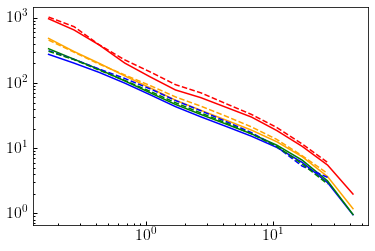

In [14]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

# __=ax.plot(rp_zehavi, wp_zehavi_18p5)
# __=ax.plot(rp_mids, wp_um_18p5)

# __=ax.plot(rp_zehavi, wp_zehavi_19p5)
# __=ax.plot(rp_mids, wp_um_19p5)

__=ax.plot(rp_mids, wp_um_18p5, color='blue')
__=ax.plot(rp_mids, wp_um_19p5, color='green')
__=ax.plot(rp_mids, wp_um_20p5, color='orange')
__=ax.plot(rp_mids, wp_um_21p5, color='red')

__=ax.plot(rp_zehavi, wp_zehavi_18p5, '--', color='blue')
__=ax.plot(rp_zehavi, wp_zehavi_19p5, '--', color='green')
__=ax.plot(rp_zehavi, wp_zehavi_20p5, '--', color='orange')
__=ax.plot(rp_zehavi, wp_zehavi_21p5, '--', color='red')




## Color-dependent clustering

In [30]:
gr_cut = 0.21 - 0.03*(umachine['rmag'] + littleh_correction)

um_mask_18p5_red = um_mask_18p5 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_18p5_blue = um_mask_18p5 & (umachine['sdss_petrosian_gr'] < gr_cut)

um_mask_19p0_red = um_mask_19p0 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_19p0_blue = um_mask_19p0 & (umachine['sdss_petrosian_gr'] < gr_cut)

um_mask_19p5_red = um_mask_19p5 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_19p5_blue = um_mask_19p5 & (umachine['sdss_petrosian_gr'] < gr_cut)

um_mask_20p0_red = um_mask_20p0 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_20p0_blue = um_mask_20p0 & (umachine['sdss_petrosian_gr'] < gr_cut)

um_mask_20p5_red = um_mask_20p5 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_20p5_blue = um_mask_20p5 & (umachine['sdss_petrosian_gr'] < gr_cut)

um_mask_21p0_red = um_mask_21p0 & (umachine['sdss_petrosian_gr'] >= gr_cut)
um_mask_21p0_blue = um_mask_21p0 & (umachine['sdss_petrosian_gr'] < gr_cut)


In [31]:
um_pos_18p5_red = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_18p5_red)

um_pos_18p5_blue = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_18p5_blue)

um_pos_19p0_red = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p0_red)

um_pos_19p0_blue = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p0_blue)

um_pos_19p5_red = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p5_red)

um_pos_19p5_blue = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_19p5_blue)

um_pos_20p0_red = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p0_red)

um_pos_20p0_blue = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p0_blue)

um_pos_20p5_red = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p5_red)

um_pos_20p5_blue = return_xyz_formatted_array(umachine['x'], umachine['y'], umachine['z'], 
                velocity=umachine['vz'], velocity_distortion_dimension='z', period=250, 
                mask=um_mask_20p5_blue)


In [32]:
wp_um_18p5_red = wp(um_pos_18p5_red, rp_bins, pi_max, period=250, num_threads='max')
wp_um_18p5_blue = wp(um_pos_18p5_blue, rp_bins, pi_max, period=250, num_threads='max')

wp_um_19p0_red = wp(um_pos_19p0_red, rp_bins, pi_max, period=250, num_threads='max')
wp_um_19p0_blue = wp(um_pos_19p0_blue, rp_bins, pi_max, period=250, num_threads='max')

wp_um_19p5_red = wp(um_pos_19p5_red, rp_bins, pi_max, period=250, num_threads='max')
wp_um_19p5_blue = wp(um_pos_19p5_blue, rp_bins, pi_max, period=250, num_threads='max')

wp_um_20p0_red = wp(um_pos_20p0_red, rp_bins, pi_max, period=250, num_threads='max')
wp_um_20p0_blue = wp(um_pos_20p0_blue, rp_bins, pi_max, period=250, num_threads='max')

wp_um_20p5_red = wp(um_pos_20p5_red, rp_bins, pi_max, period=250, num_threads='max')
wp_um_20p5_blue = wp(um_pos_20p5_blue, rp_bins, pi_max, period=250, num_threads='max')


In [65]:
zehavi_data_blue_18p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_18.5_mblue.dat"))
zehavi_data_blue_19p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_19.0_mblue.dat"))
zehavi_data_blue_19p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_19.5_mblue.dat"))
zehavi_data_blue_20p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_20.0_mblue.dat"))
zehavi_data_blue_20p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_20.5_mblue.dat"))
zehavi_data_blue_21p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_21.0_mblue.dat"))
zehavi_data_blue_21p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_21.5_mblue.dat"))

zehavi_data_red_18p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_18.5_mred.dat"))
zehavi_data_red_19p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_19.0_mred.dat"))
zehavi_data_red_19p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_19.5_mred.dat"))
zehavi_data_red_20p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_20.0_mred.dat"))
zehavi_data_red_20p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_20.5_mred.dat"))
zehavi_data_red_21p0 = np.loadtxt(os.path.join(zehavi_dirname, "wp_21.0_mred.dat"))
zehavi_data_red_21p5 = np.loadtxt(os.path.join(zehavi_dirname, "wp_21.5_mred.dat"))

rp_zehavi_color = zehavi_data_blue_18p5[:, 0]
wp_zehavi_18p5_blue = zehavi_data_blue_18p5[:, 1]
wp_zehavi_19p0_blue = zehavi_data_blue_19p0[:, 1]
wp_zehavi_19p5_blue = zehavi_data_blue_19p5[:, 1]
wp_zehavi_20p0_blue = zehavi_data_blue_20p0[:, 1]
wp_zehavi_20p5_blue = zehavi_data_blue_20p5[:, 1]
wp_zehavi_21p0_blue = zehavi_data_blue_21p0[:, 1]
wp_zehavi_21p5_blue = zehavi_data_blue_21p5[:, 1]

wp_zehavi_18p5_blue_err = zehavi_data_blue_18p5[:, 4]
wp_zehavi_19p0_blue_err = zehavi_data_blue_19p0[:, 4]
wp_zehavi_19p5_blue_err = zehavi_data_blue_19p5[:, 4]
wp_zehavi_20p0_blue_err = zehavi_data_blue_20p0[:, 4]
wp_zehavi_20p5_blue_err = zehavi_data_blue_20p5[:, 4]
wp_zehavi_21p0_blue_err = zehavi_data_blue_21p0[:, 4]
wp_zehavi_21p5_blue_err = zehavi_data_blue_21p5[:, 4]


wp_zehavi_18p5_red = zehavi_data_red_18p5[:, 1]
wp_zehavi_19p0_red = zehavi_data_red_19p0[:, 1]
wp_zehavi_19p5_red = zehavi_data_red_19p5[:, 1]
wp_zehavi_20p0_red = zehavi_data_red_20p0[:, 1]
wp_zehavi_20p5_red = zehavi_data_red_20p5[:, 1]
wp_zehavi_21p0_red = zehavi_data_red_21p0[:, 1]
wp_zehavi_21p5_red = zehavi_data_red_21p5[:, 1]

wp_zehavi_18p5_red_err = zehavi_data_red_18p5[:, 4]
wp_zehavi_19p0_red_err = zehavi_data_red_19p0[:, 4]
wp_zehavi_19p5_red_err = zehavi_data_red_19p5[:, 4]
wp_zehavi_20p0_red_err = zehavi_data_red_20p0[:, 4]
wp_zehavi_20p5_red_err = zehavi_data_red_20p5[:, 4]
wp_zehavi_21p0_red_err = zehavi_data_red_21p0[:, 4]
wp_zehavi_21p5_red_err = zehavi_data_red_21p5[:, 4]


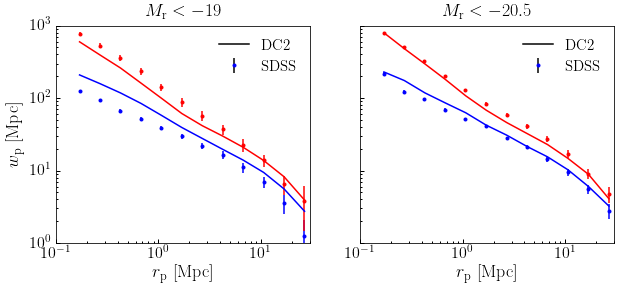

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1, ax2 = axes

for ax in axes:
    __=ax.loglog()
    xlabel = ax.set_xlabel(r'$r_{\rm p}\ [{\rm Mpc}]$')
    ylim = ax.set_ylim(1, 1000)
    xlim = ax.set_xlim(0.1, 30)
    
ylabel1 = ax1.set_ylabel(r'$w_{\rm p}\ [{\rm Mpc}]$')
title1 = ax1.set_title(r'$M_{\rm r} < -19$')
title2 = ax2.set_title(r'$M_{\rm r} < -20.5$')

__=ax1.errorbar(rp_zehavi_color[:-1], wp_zehavi_19p0_blue[:-1], wp_zehavi_19p0_blue_err[:-1], 
                color='blue', fmt='.', label=r'${\rm SDSS}$')
__=ax1.errorbar(rp_zehavi_color[:-1], wp_zehavi_19p0_red[:-1], wp_zehavi_19p0_red_err[:-1], 
                color='red', fmt='.')

__=ax1.plot(rp_mids[:-1], wp_um_19p0_blue[:-1], color='blue', label=r'${\rm DC2}$')
__=ax1.plot(rp_mids[:-1], wp_um_19p0_red[:-1], color='red')


__=ax2.plot(rp_mids[:-1], wp_um_20p5_blue[:-1], color='blue')
__=ax2.plot(rp_mids[:-1], wp_um_20p5_red[:-1], color='red', label=r'${\rm DC2}$')


__=ax2.errorbar(rp_zehavi_color[:-1], wp_zehavi_20p5_blue[:-1], wp_zehavi_20p5_blue_err[:-1], 
                color='blue', fmt='.', label=r'${\rm SDSS}$')
__=ax2.errorbar(rp_zehavi_color[:-1], wp_zehavi_20p5_red[:-1], wp_zehavi_20p5_red_err[:-1], 
                color='red', fmt='.')

legend1 = ax1.legend()
legend1.legendHandles[0].set_color('k')
legend1.legendHandles[1].set_color('k')

legend2 = ax2.legend()
legend2.legendHandles[0].set_color('k')
legend2.legendHandles[1].set_color('k')

figname = 'two_panel_color_clustering.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')

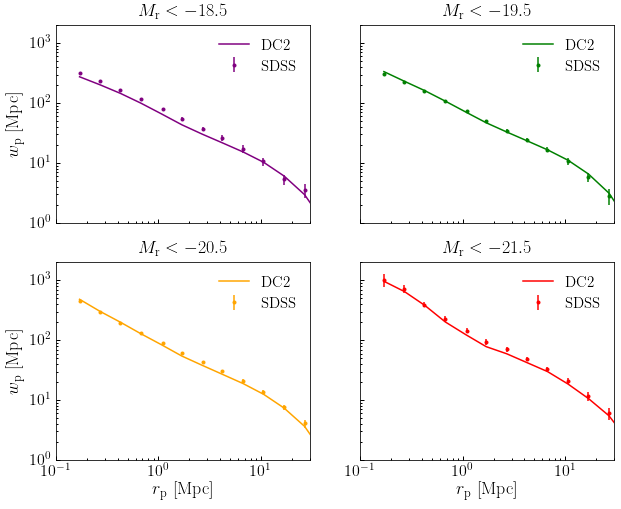

In [109]:
fig, _axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
(ax1, ax2), (ax3, ax4) = _axes
axes = ax1, ax2, ax3, ax4

for ax in axes:
    __=ax.loglog()
    ylim = ax.set_ylim(1, 2000)
    xlim = ax.set_xlim(0.1, 30)


__=ax1.plot(rp_mids, wp_um_18p5, color='purple', label=r'${\rm DC2}$')
__=ax1.errorbar(rp_zehavi, wp_zehavi_18p5, wp_zehavi_18p5_blue_err[:-1],
               fmt='.', color='purple', label=r'${\rm SDSS}$')

__=ax2.plot(rp_mids, wp_um_19p5, color='green', label=r'${\rm DC2}$')
__=ax2.errorbar(rp_zehavi, wp_zehavi_19p5, wp_zehavi_19p5_blue_err[:-1],
               fmt='.', color='green', label=r'${\rm SDSS}$')

__=ax3.plot(rp_mids, wp_um_20p5, color='orange', label=r'${\rm DC2}$')
__=ax3.errorbar(rp_zehavi, wp_zehavi_20p5, wp_zehavi_20p5_blue_err[:-1],
               fmt='.', color='orange', label=r'${\rm SDSS}$')

__=ax4.plot(rp_mids, wp_um_21p5, color='red', label=r'${\rm DC2}$')
__=ax4.errorbar(rp_zehavi, wp_zehavi_21p5, wp_zehavi_21p5_blue_err[:-1],
               fmt='.', color='red', label=r'${\rm SDSS}$')

title1 = ax1.set_title(r'$M_{\rm r} < -18.5$')
title2 = ax2.set_title(r'$M_{\rm r} < -19.5$')
title3 = ax3.set_title(r'$M_{\rm r} < -20.5$')
title4 = ax4.set_title(r'$M_{\rm r} < -21.5$')

for ax in axes:
    __=ax.legend()
    
xlabel3 = ax3.set_xlabel(r'$r_{\rm p}\ [{\rm Mpc}]$')
xlabel4 = ax4.set_xlabel(r'$r_{\rm p}\ [{\rm Mpc}]$')
ylabel1 = ax1.set_ylabel(r'$w_{\rm p}\ [{\rm Mpc}]$')
ylabel3 = ax3.set_ylabel(r'$w_{\rm p}\ [{\rm Mpc}]$')

figname = 'four_panel_luminosity_clustering.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')

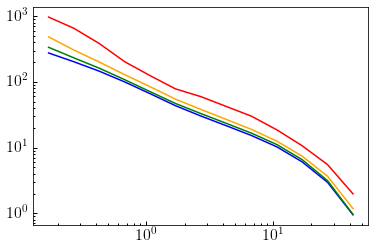

In [108]:
fig, ax = plt.subplots(1, 1)
__=ax.loglog()

# __=ax.plot(rp_zehavi, wp_zehavi_18p5)
# __=ax.plot(rp_mids, wp_um_18p5)

# __=ax.plot(rp_zehavi, wp_zehavi_19p5)
# __=ax.plot(rp_mids, wp_um_19p5)

__=ax.plot(rp_mids, wp_um_18p5, color='blue')
__=ax.plot(rp_mids, wp_um_19p5, color='green')
__=ax.plot(rp_mids, wp_um_20p5, color='orange')
__=ax.plot(rp_mids, wp_um_21p5, color='red')

# __=ax.plot(rp_zehavi, wp_zehavi_18p5, '--', color='blue')
# __=ax.plot(rp_zehavi, wp_zehavi_19p5, '--', color='green')
# __=ax.plot(rp_zehavi, wp_zehavi_20p5, '--', color='orange')
# __=ax.plot(rp_zehavi, wp_zehavi_21p5, '--', color='red')




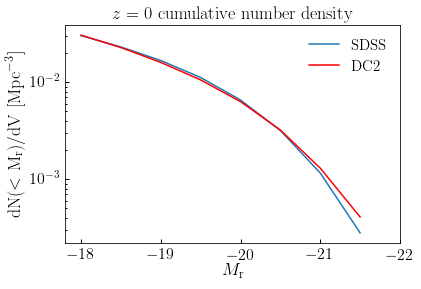

In [131]:
ndarr = np.array((3.030, 2.311, 1.676, 1.12, 0.656, 0.318, 0.116, 0.028))

magrarr = np.array((-18, -18.5, -19, -19.5, -20, -20.5, -21, -21.5))

um_ndarr = []
for magr in magrarr:
    um_ndarr.append(np.count_nonzero(umachine['rmag'] < magr + littleh_correction))
um_ndarr = np.array(um_ndarr)/(250.**3)
    
fig, ax = plt.subplots(1, 1)
yscale = ax.set_yscale('log')

__=ax.plot(magrarr, ndarr/100., label=r'${\rm SDSS}$')
__=ax.plot(magrarr, um_ndarr, color='red', label=r'${\rm DC2}$')

xlim = ax.set_xlim(-17.8, -22)

xlabel = ax.set_xlabel(r'$M_{\rm r}$')
ylabel = ax.set_ylabel(r'${\rm dN({<M_r})/dV}\ [{\rm Mpc^{-3}}]$')
title = ax.set_title(r'$z=0\ {\rm cumulative\ number\ density}$')
legend = ax.legend()

figname = 'cumulative_number_density.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')